# Data analysis

### Introduction

This is part of Udacity's data science nanodegree program, and more infomration can be found [here](https://www.udacity.com/nanodegree)

The data used in this post is the *Crop Recommendation* dataset, which is provided by [Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/4GBWFV), and is also featured on Kaggle




In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

df = pd.read_csv('./Crop_recommendation.csv')
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Exploratory analysis on each column 

In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,52.647024,58.126105,52.031232,24.711674,65.848856,6.438962,99.364935
std,38.536964,34.164342,57.068796,4.910428,24.432640,0.870411,50.436396
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,21.000000,36.000000,19.000000,21.631491,51.278688,5.861399,66.838723
50%,37.000000,54.000000,27.000000,24.910323,77.906210,6.354007,93.123306
75%,90.000000,72.000000,52.000000,27.834871,83.856427,6.932537,115.356032
max,140.000000,145.000000,205.000000,41.948657,94.964199,9.935091,298.560117


C:\Users\CLIU210\AppData\Local\Temp\ipykernel_30976\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

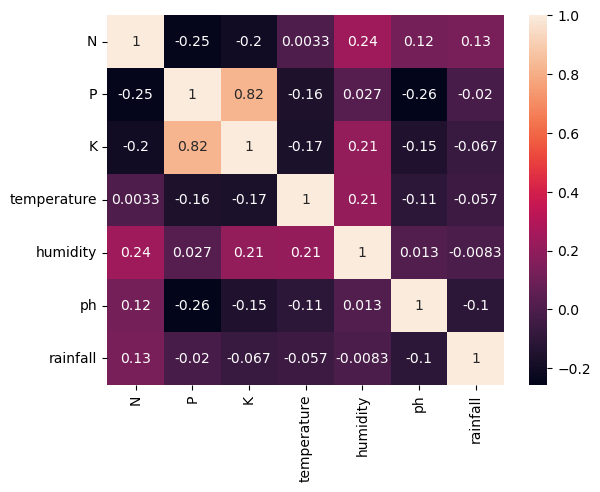

In [5]:
sns.heatmap(df.corr(),annot=True)

Surprisingly, rainfall and humidity does not have strong correlation, however, the phosphrous and potassium exhibit a strong correlation relationship with a coefficient of 0.82

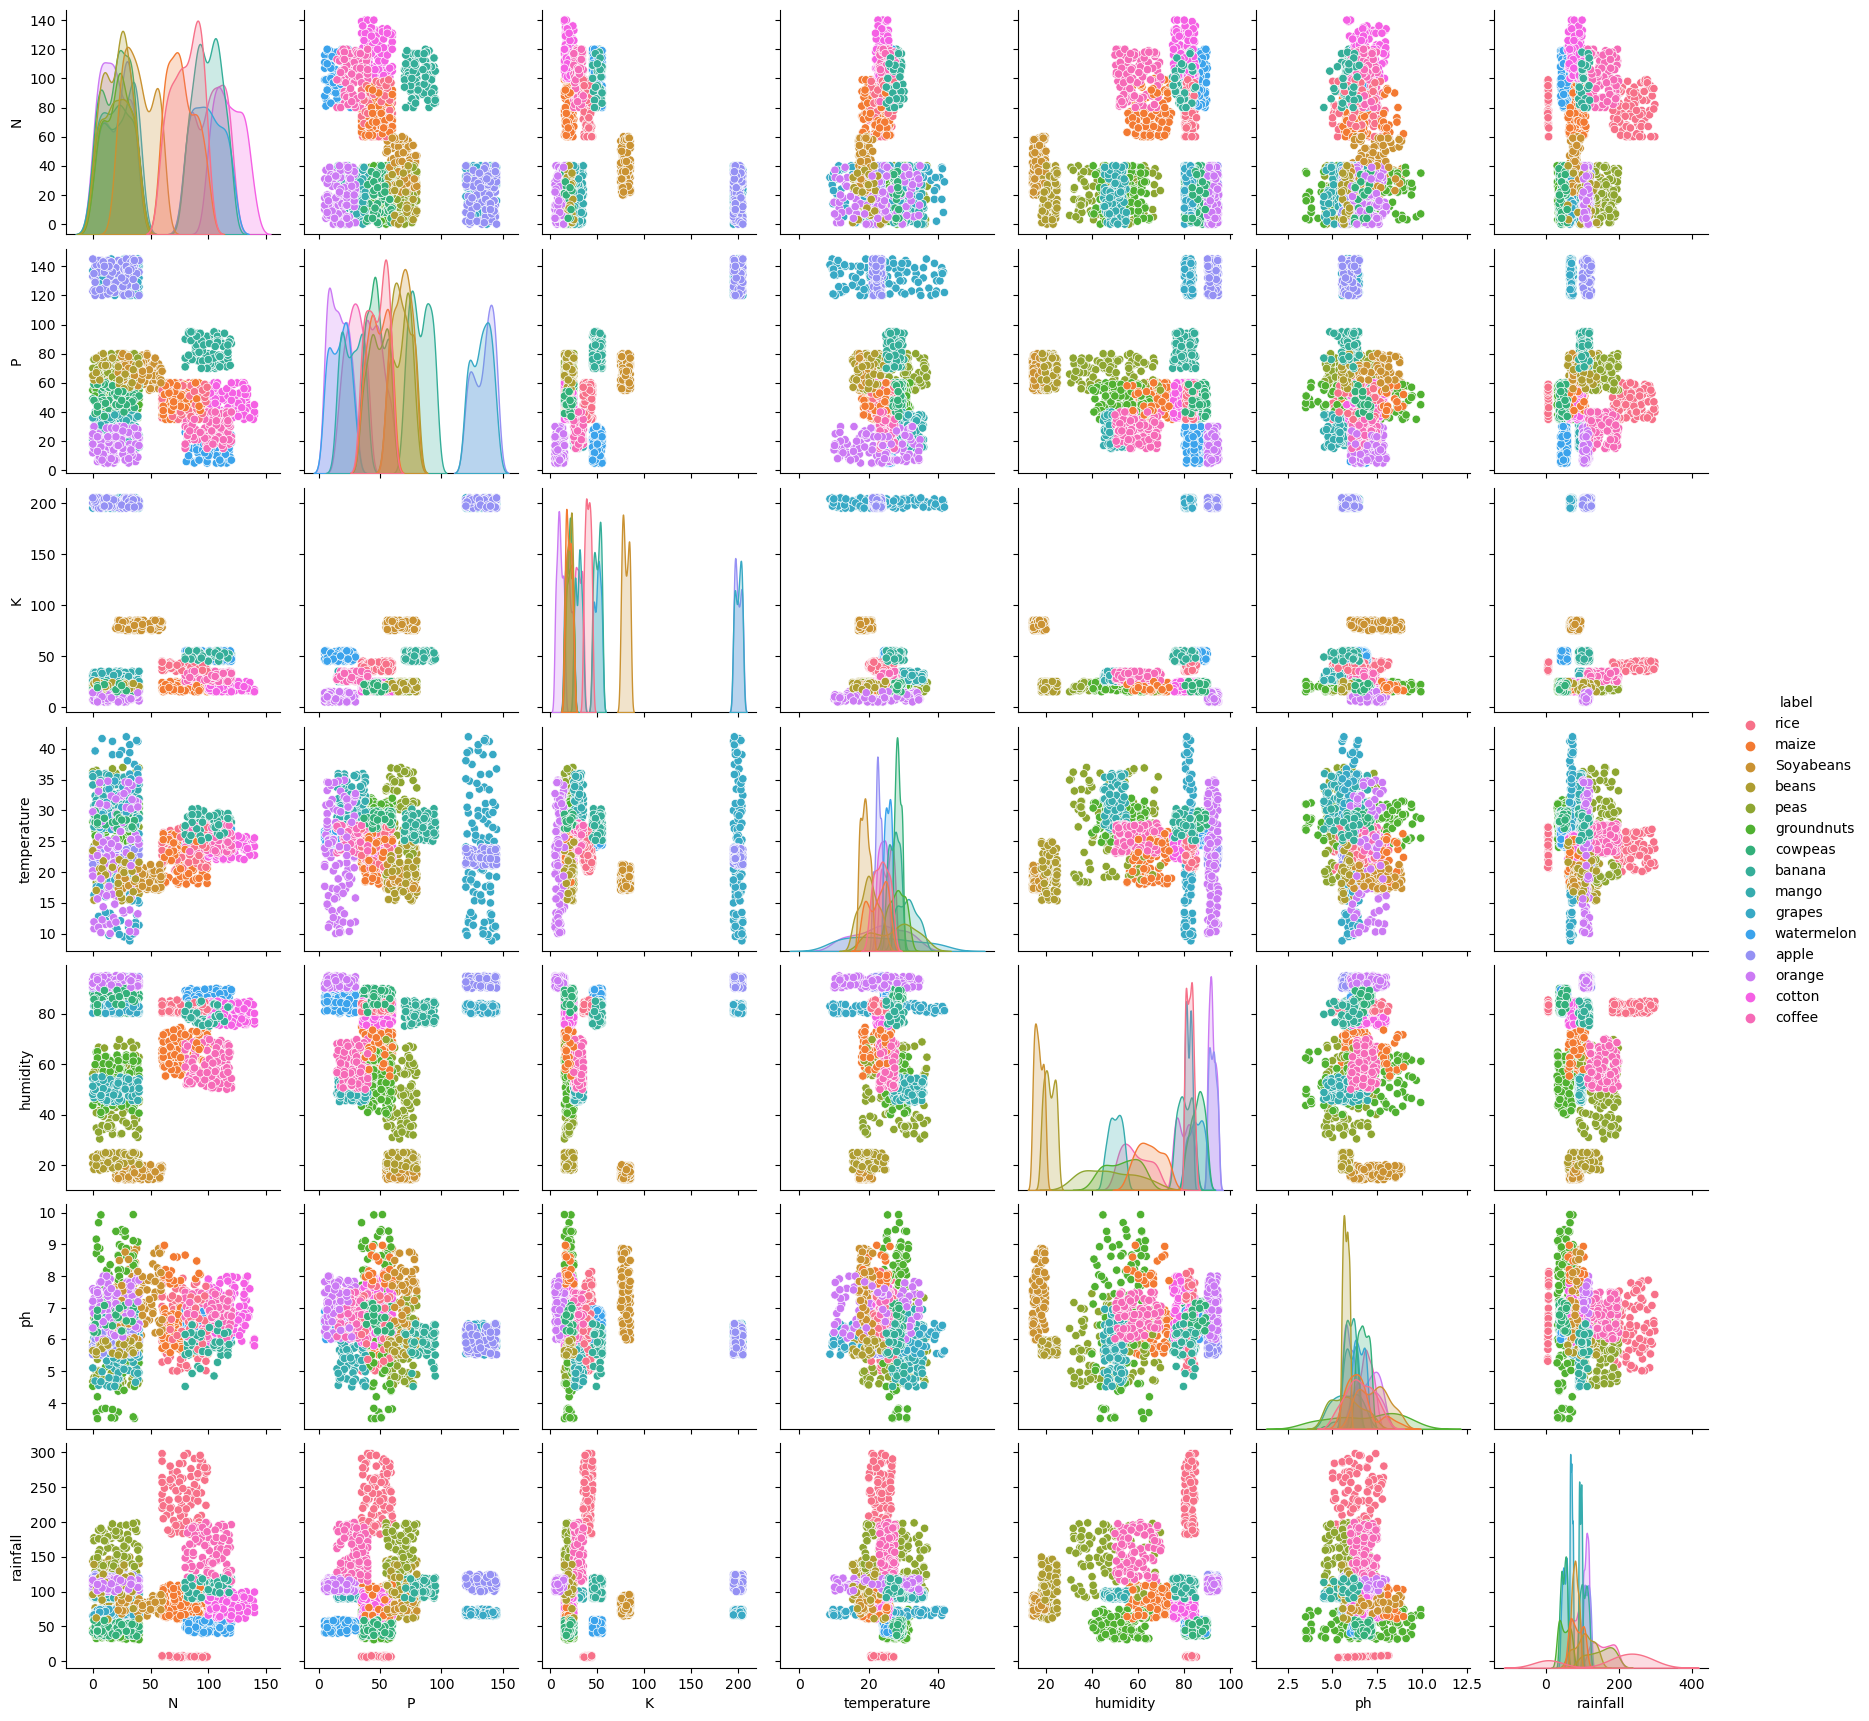

In [6]:
sns.pairplot(df, hue='label')

From the pairplot, it's very apparent that data is very clustered, and each recommended crop falls in a very specified range in terms of feature. Let's further explore this by plotting the stripplot of every feature

<AxesSubplot:xlabel='N', ylabel='label'>

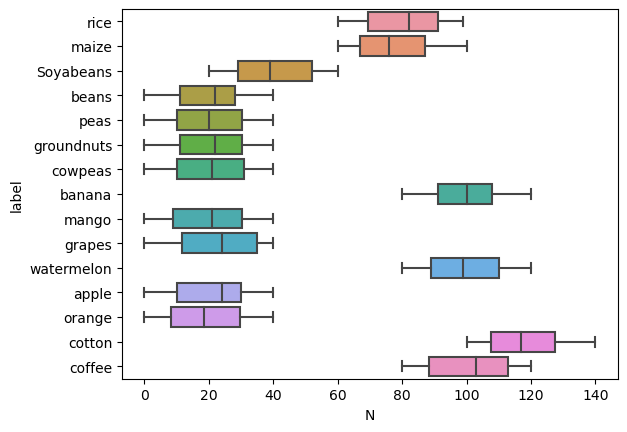

In [7]:
df.select_dtypes(include = [int, float]).columns
sns.boxplot(data=df, x='N', y='label')

<AxesSubplot:xlabel='N', ylabel='label'>

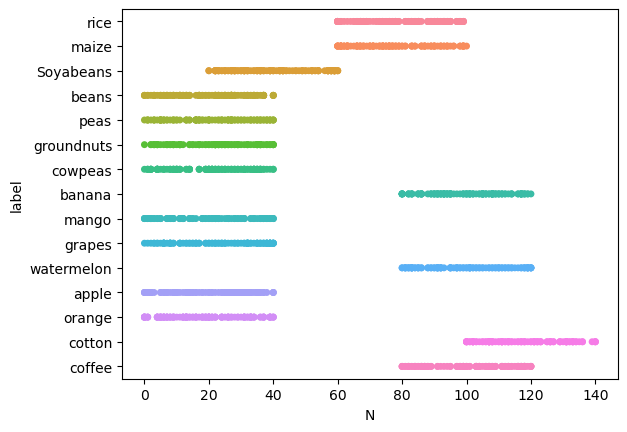

In [8]:
sns.stripplot(data=df, x='N', y='label', jitter=False)

Looks like the stripplot is a prettier visualization method for this purpose, and here's the rest of the columns

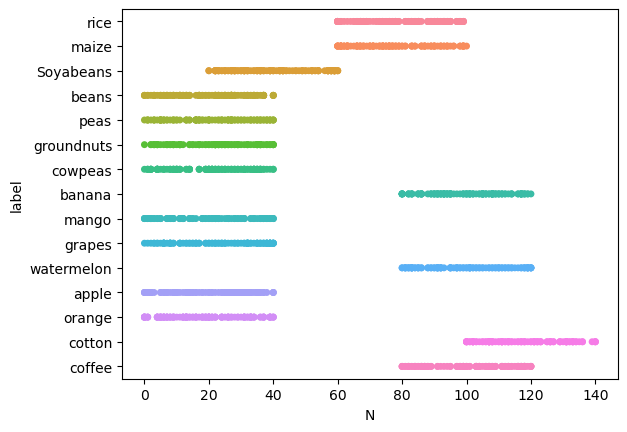

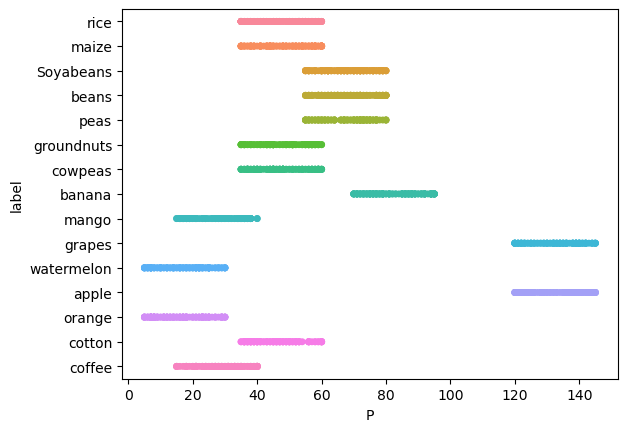

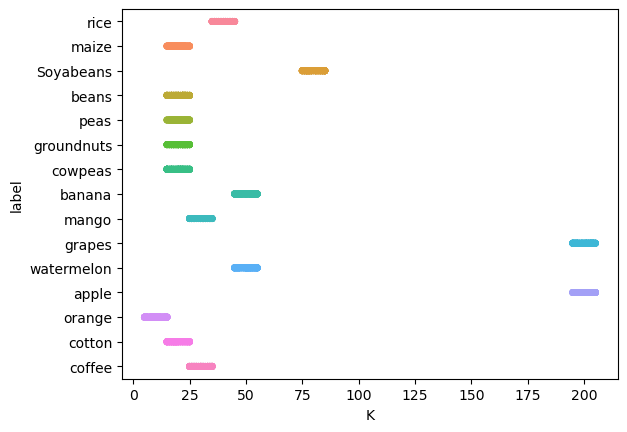

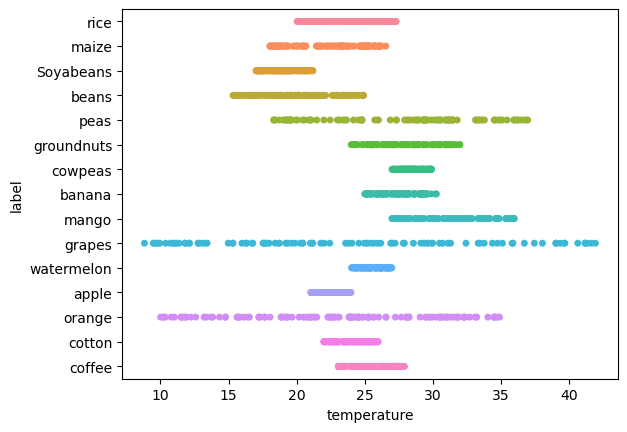

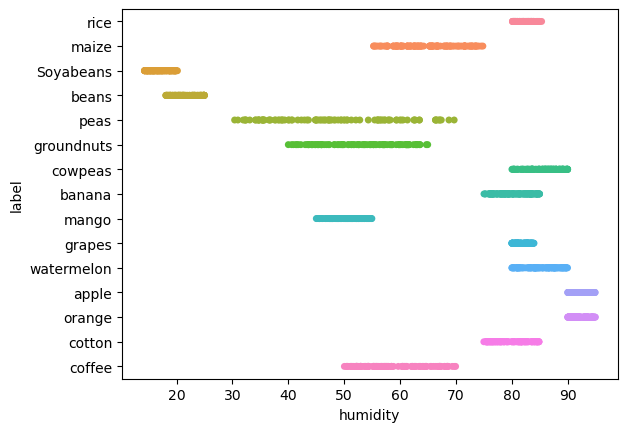

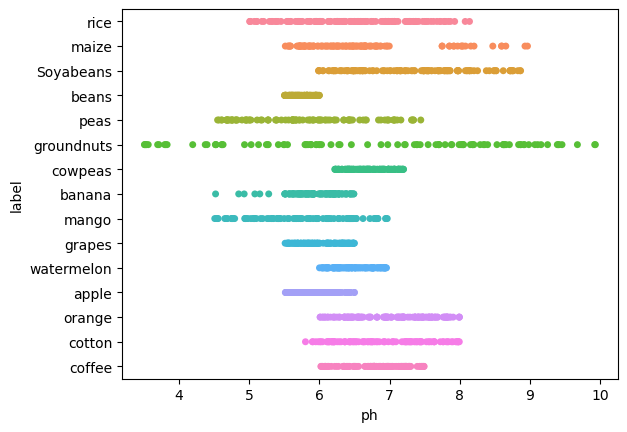

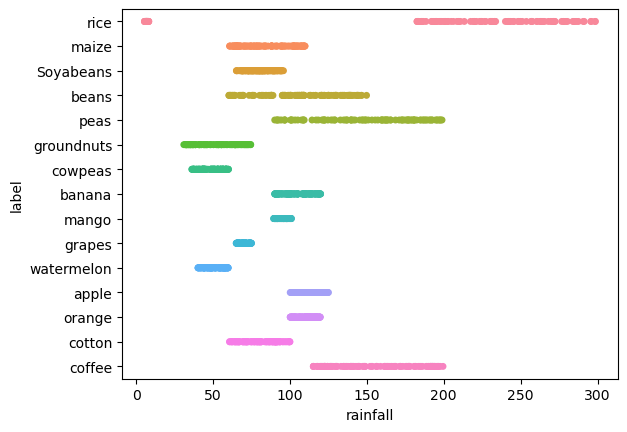

In [9]:
cols = list(df.select_dtypes(include=[int, float]).columns)

for col in cols:
    plt.figure()
    sns.stripplot(data=df, x=col, y='label', jitter=False)



As show in above, most crops falls in a relative short range of values, with only a few exceptions, like grape/temperature, rice/rainfall, groundnuts/ph. 

Lets try a few algorithms for the classification task. The intention of the 

In [31]:
# Exploring different classification alogrithms 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

def decision_tree(X_train, X_test, y_train, y_test, random_state=42):
    clf = DecisionTreeClassifier(random_state=random_state)
    clf = clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    train_score = f1_score(y_train, y_train_pred, average='micro')
    test_score = f1_score(y_test, y_test_pred, average='micro')
    print('DecisionTree Classifier')
    print(classification_report(y_test, y_test_pred))
    return train_score, test_score


def knn(X_train, X_test, y_train, y_test, n_neighbors=10):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf = clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    train_score = f1_score(y_train, y_train_pred, average='micro')
    test_score = f1_score(y_test, y_test_pred, average='micro')
    print('KNearestNeighbor Classifier')
    print(classification_report(y_test, y_test_pred))
    return train_score, test_score

def svmc(X_train, X_test, y_train, y_test, random_state=42, kernel='linear'):
    clf = SVC(random_state=random_state, kernel=kernel)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    train_score = f1_score(y_train, y_train_pred, average='micro')
    test_score = f1_score(y_test, y_test_pred, average='micro')
    print('SVM Classifier')
    print(classification_report(y_test, y_test_pred))
    return train_score, test_score

def logistic(X_train, X_test, y_train, y_test, random_state=42, solver='lbfgs'):
    clf = LogisticRegression(random_state=random_state, solver=solver)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    train_score = f1_score(y_train, y_train_pred, average='micro')
    test_score = f1_score(y_test, y_test_pred, average='micro')
    print('Logistic Classifier')
    print(classification_report(y_test, y_test_pred))
    return train_score, test_score


def nn(X_train, X_test, y_train, y_test, random_state=42):
    clf = MLPClassifier(activation = 'relu', random_state=42, max_iter=2000)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    train_score = f1_score(y_train, y_train_pred, average='micro')
    test_score = f1_score(y_test, y_test_pred, average='micro')
    print('Neural Network Classifier')
    print(classification_report(y_test, y_test_pred))
    return train_score, test_score


Summarizing all the classification methods together, and seeing their scores 


In [19]:
from sklearn.preprocessing import MinMaxScaler

# Train test split
X = df.drop(labels='label', axis=1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
functions = [decision_tree, knn, svmc, logistic, nn]
function_names = ['decision_tree', 'knn', 'svmc', 'logistic', 'nn']

result = []
for func in functions:
    scores = func(X_train, X_test, y_train, y_test)
    app = {'Training f1 score': scores[0], 'Testing f1 score': scores[1]}
    result.append(app)



DecisionTree Classifier
              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        41
       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        39
       beans       1.00      1.00      1.00        45
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        39
     cowpeas       1.00      1.00      1.00        32
      grapes       1.00      1.00      1.00        32
  groundnuts       1.00      1.00      1.00        36
       maize       1.00      1.00      1.00        29
       mango       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        36
        peas       1.00      1.00      1.00        35
        rice       1.00      1.00      1.00        29
  watermelon       1.00      1.00      1.00        26

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
we

In [33]:
result_df= pd.DataFrame(result)
result_df.index = function_names
result_df.transpose()

,decision_tree,knn,svmc,logistic,nn
Training f1 score,1.0,0.996630,0.987363,0.95535,0.999158
Testing f1 score,1.0,0.990196,0.982353,0.94902,0.994118


<AxesSubplot:>

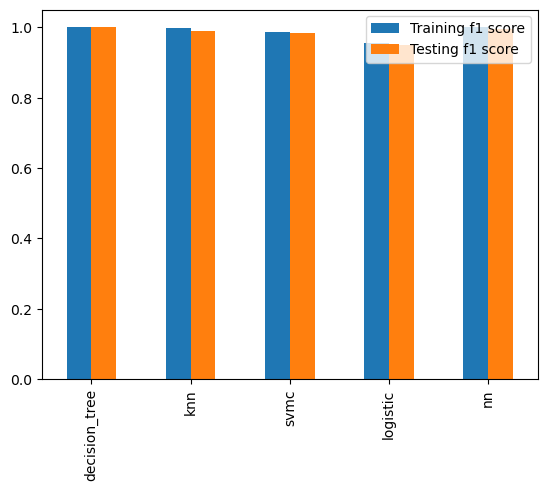

In [36]:
result_df.plot.bar()